# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 18__

__Nombres de los estudiantes: Hong Xiang Chen, Adrian Turiel Charro y Andrés Teruel Fernández__

In [ ]:
RANDOM_STATE=333

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [87]:
#import csv
import numpy as np
import pandas as pd
 
df = pd.read_csv('countries_of_the_world.csv')
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [93]:
df = df.drop(['Region'], axis=1)
df = df.dropna()
df

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [94]:
# Comentarios:



## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

### Descripción de las variables

Literacy - la definición mas común es: El % de personas que pueden leer y escribir a partir de una cierta edad.


GPD per capita - Métrica que describe cuánto gana cada persona de media en ese pais al año.


Phones (per 1000) - Mide el número de teléfonos por cada 1000 habitantes


Agriculture, Industry y Service - % de la economía del país en la que afecta cada sector.

In [95]:
subconjunto = df.loc[:,["GDP ($ per capita)", "Literacy (%)", "Phones (per 1000)", "Agriculture","Industry", "Service"]]
subconjunto

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
0,700.0,36.0,3.2,0.380,0.240,0.380
1,4500.0,86.5,71.2,0.232,0.188,0.579
2,6000.0,70.0,78.1,0.101,0.600,0.298
6,8600.0,95.0,460.0,0.040,0.180,0.780
7,11000.0,89.0,549.9,0.038,0.220,0.743
...,...,...,...,...,...,...
218,4800.0,93.4,140.1,0.040,0.419,0.541
219,2500.0,90.3,187.7,0.209,0.410,0.381
224,800.0,50.2,37.2,0.135,0.472,0.393
225,800.0,80.6,8.2,0.220,0.290,0.489


In [119]:
#SELECCIONANDO DATOS
v1 = subconjunto.loc[:,"GDP ($ per capita)"]
v2 = subconjunto.loc[:,"Literacy (%)"]
v3 = subconjunto.loc[:,"Phones (per 1000)"]
v4 = subconjunto.loc[:,"Agriculture"]
v5 = subconjunto.loc[:,"Agriculture"]
v6 = subconjunto.loc[:,"Service"]

In [135]:
set(subconjunto)

{'Agriculture',
 'GDP ($ per capita)',
 'Industry',
 'Literacy (%)',
 'Phones (per 1000)',
 'Service'}

In [120]:
#MEDIAS
print('Media de GDP: ',np.mean(v1))
print('Media de Literacy: ',np.mean(v2))
print('Media de Phones: ',np.mean(media3))
print('Media de Agriculture: ',np.mean(v4))
print('Media de Industry: ',np.mean(v5))
print('Media de Service: ',np.mean(v6))

Media de GDP:  9125.698324022347
Media de Literacy:  81.94413407821229
Media de Phones:  208.1519553072626
Media de Agriculture:  0.1569050279329609
Media de Industry:  0.1569050279329609
Media de Service:  0.5545083798882683


In [121]:
#DESVIACION AUTOMATICO
print('Desviación de GDP: ',np.std(v1))
print('Desviación de Literacy: ',np.std(v2))
print('Desviación de Phones: ',np.std(v3))
print('Desviación de Agriculture: ',np.std(v4))
print('Desviación de Industry: ',np.std(v5))
print('Desviación de Service: ',np.std(v6))

Desviación de GDP:  9617.146520351442
Desviación de Literacy:  19.782047238980685
Desviación de Phones:  209.53412072398476
Desviación de Agriculture:  0.15091944252197748
Desviación de Industry:  0.15091944252197748
Desviación de Service:  0.1652062320004565


In [122]:
#RANGOS
print('Rango de GDP (',np.min(v1), ' - ',np.max(v1), ')')
print('Rango de Literacy (',np.min(v2), ' - ',np.max(v2), ')')
print('Rango de Phones (',np.min(v3), '-',np.max(v3), ')')
print('Rango de Agriculture (',np.min(v4), '-',np.max(v4), ')')
print('Rango de Industry (',np.min(v5), '-',np.max(v5), ')')
print('Rango de Service (',np.min(v6), '-',np.max(v6), ')')

Rango de GDP ( 500.0  -  37800.0 )
Rango de Literacy ( 17.6  -  100.0 )
Rango de Phones ( 0.2 - 898.0 )
Rango de Agriculture ( 0.0 - 0.769 )
Rango de Industry ( 0.0 - 0.769 )
Rango de Service ( 0.062 - 0.9540000000000001 )


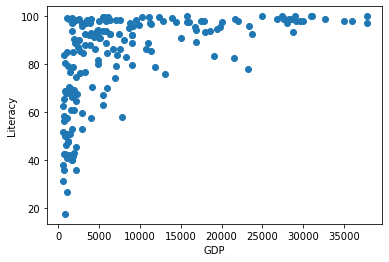

In [132]:
#DIAGRAMA DE DISPERSIÓN
fig, ax = plt.subplots()

ax.scatter(x = subconjunto['GDP ($ per capita)'], y = subconjunto['Literacy (%)'])
plt.xlabel("GDP")
plt.ylabel("Literacy")
plt.show()

In [129]:
#COEFICIENTE DE CORRELACIÓN
print('Coeficientes de correlación entre ...\n')
print('GDP - Literacy: ', np.corrcoef(v1, v2)[0][1])
print('GDP - Phones: ', np.corrcoef(v1, v3)[0][1])
print('GDP - Agriculture: ', np.corrcoef(v1, v4)[0][1])
print('GDP - Industry: ', np.corrcoef(v1, v5)[0][1])
print('GDP - Service: ', np.corrcoef(v1, v6)[0][1])

print('Literacy - Phones: ', np.corrcoef(v2, v3)[0][1])
print('Literacy - Agriculture: ', np.corrcoef(v2, v4)[0][1])
print('Literacy - Industry: ', np.corrcoef(v2, v5)[0][1])
print('Literacy - Service: ', np.corrcoef(v2, v6)[0][1])

print('Phones - Agriculture: ', np.corrcoef(v3, v4)[0][1])
print('Phones - Industry: ', np.corrcoef(v3, v5)[0][1])
print('Phones - Service: ', np.corrcoef(v3, v6)[0][1])

print('Agriculture - Industry: ', np.corrcoef(v4, v5)[0][1])
print('Agriculture - Service: ', np.corrcoef(v4, v6)[0][1])

print('Industry - Service: ', np.corrcoef(v5, v6)[0][1])

Coeficientes de correlación entre ...

GDP - Literacy:  0.522880130129711
GDP - Phones:  [[1.         0.88352011]
 [0.88352011 1.        ]]
GDP - Agriculture:  [[ 1.        -0.6169188]
 [-0.6169188  1.       ]]
GDP - Industry:  [[ 1.        -0.6169188]
 [-0.6169188  1.       ]]
GDP - Service:  [[1.         0.53655075]
 [0.53655075 1.        ]]
Literacy - Phones:  [[1.         0.59204247]
 [0.59204247 1.        ]]
Literacy - Agriculture:  [[ 1.         -0.62051376]
 [-0.62051376  1.        ]]
Literacy - Industry:  [[ 1.         -0.62051376]
 [-0.62051376  1.        ]]
Literacy - Service:  [[1.         0.47439503]
 [0.47439503 1.        ]]
Phones - Agriculture:  [[ 1.         -0.63157813]
 [-0.63157813  1.        ]]
Phones - Industry:  [[ 1.         -0.63157813]
 [-0.63157813  1.        ]]
Phones - Service:  [[1.         0.64963819]
 [0.64963819 1.        ]]
Agriculture - Industry:  [[1. 1.]
 [1. 1.]]
Agriculture - Service:  [[ 1.         -0.61348901]
 [-0.61348901  1.        ]]
Industry

In [94]:
# Comentarios:



## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.